In [1]:
import dill
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import FunctionTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## EDA and Feature Ingeeniring

In [2]:
with open('data/ga_sessions.pkl', 'rb') as file:
    sessions = pickle.load(file)

In [3]:
sessions.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,None,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,None,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [4]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


In [5]:
sessions.shape

(1860042, 18)

In [6]:
cols = sessions.columns.to_list()

for col in cols:
    print(f'{col}, {sum(sessions[col].isna())}, % isna {round(100 * sum(sessions[col].isna()) / sessions.shape[0], 2)} %')

session_id, 0, % isna 0.0 %
client_id, 0, % isna 0.0 %
visit_date, 0, % isna 0.0 %
visit_time, 0, % isna 0.0 %
visit_number, 0, % isna 0.0 %
utm_source, 97, % isna 0.01 %
utm_medium, 0, % isna 0.0 %
utm_campaign, 219603, % isna 11.81 %
utm_adcontent, 335615, % isna 18.04 %
utm_keyword, 1082061, % isna 58.17 %
device_category, 0, % isna 0.0 %
device_os, 1070138, % isna 57.53 %
device_brand, 118678, % isna 6.38 %
device_model, 1843704, % isna 99.12 %
device_screen_resolution, 0, % isna 0.0 %
device_browser, 0, % isna 0.0 %
geo_country, 0, % isna 0.0 %
geo_city, 0, % isna 0.0 %


In [13]:
#drop_duplicates
sessions.drop_duplicates()
sessions.shape

(1860042, 18)

In [15]:
# del empty cols
empty_cols = ['utm_keyword', 'device_os', 'device_model', 'utm_campaign', 'utm_adcontent', 'visit_time']
sessions = sessions.drop(empty_cols, axis=1)
sessions.shape

(1860042, 15)

In [ ]:
#transform cols
Органический трафик — все визиты с ga_sessions.utm_medium in ('organic',
'referral', '(none)').

Реклама в социальных сетях — все визиты с ga_sessions.utm_source in
('QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs',
'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw',
'gVRrcxiDQubJiljoTbGm').

In [27]:
sessions['utm_medium'].value_counts()

banner               552272
cpc                  434794
(none)               300575
cpm                  242083
referral             152050
organic               63034
email                 29240
push                  28035
stories               10582
cpv                    8022
blogger_channel        8015
smartbanner            6794
blogger_stories        4312
cpa                    4279
tg                     4011
app                    2836
post                   2326
smm                    1985
outlook                1332
clicks                  934
blogger_header          771
(not set)               480
info_text               343
sms                     239
landing                 134
partner                  97
fb_smm                   66
vk_smm                   65
link                     57
cbaafe                   47
CPM                      40
yandex_cpc               36
ok_smm                   28
static                   22
google_cpc               20
article             

In [29]:
# Разделим трафик по категориям: огранический, самые популярные неорганический и остальные
sessions['utm_medium'] = sessions['utm_medium'].apply(lambda x: 'organic' if x in ['organic', 'referral', '(none)'] else x)

In [31]:
sessions['utm_medium'] = sessions['utm_medium'].apply(lambda x: x if x in ['organic', 'banner', 'cpc', 'cpm'] else 'other')

In [32]:
sessions['utm_medium'].value_counts()

banner     552272
organic    515659
cpc        434794
cpm        242083
other      115234
Name: utm_medium, dtype: int64

In [28]:
sessions['utm_source'].value_counts()

ZpYIoDJMcFzVoPFsHGJL    578290
fDLlAcSmythWSCVMvqvL    300575
kjsLglQLzykiRbcDiGcD    266354
MvfHsxITijuriZxsqZqt    186199
BHcvLfOaCWvWTykYqHVe    116320
                         ...  
GYkgJdhSxirUFPHFiYSe         1
WRHPhoRKhKxaenRCLBfo         1
tjKUGseGMhkLEzdCqBRx         1
wpmatvDuiMutnvmNVPJo         1
BellrslNBZQZaIxVFGXJ         1
Name: utm_source, Length: 293, dtype: int64

In [33]:
# Рекламу в соц сетях разделим на да - 1, нет - 0
commerce = ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs',
'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw',
'gVRrcxiDQubJiljoTbGm']

sessions['utm_source'] = sessions['utm_source'].apply(lambda x: 1 if x in commerce else 0)

In [34]:
sessions['utm_source'].value_counts()

0    1585815
1     274227
Name: utm_source, dtype: int64

In [35]:
# Непонятные значения. Удалю.
sessions['utm_campaign'].value_counts()

LTuZkdKfxRGVceoWkVyg    463481
LEoPHuyFvzoNfnzGgfcd    324044
FTjNLDyTrXaWYgZymFkV    247360
gecBYcKZCPMcVYdSSzKP    134042
TmThBvoCcwkCZZUWACYq     26597
                         ...  
cqgnjDbqrtCipVvzhxqa         1
AdtHYglxfCpTpwZeTAuW         1
pcvPxfVFaAmhwFmvIeYd         1
qPDTdivQVeflLjTYIJnG         1
cXxuwXPoQCvAXPHpFcZl         1
Name: utm_campaign, Length: 412, dtype: int64

In [36]:
# Непонятные значения. Удалю.
sessions['utm_adcontent'].value_counts()

JNHcPlZPxEMWDnRiyoBf    1006599
vCIpmpaGBnIQhyYNkXqp     181048
xhoenQgDQsgfEPYNPwKO     113072
PkybGvWbaqORmxjNunqZ      60316
LLfCasrxQzJIyuldcuWy      24222
                         ...   
ryswqHdLvbezpDLjokYF          1
gQEnaeQmOHisHSTEyzhp          1
PlanrlymnpCeYvUrUTVJ          1
WbXQsVOKLOcJrHikuQTZ          1
oJivRDNIrrOckRBIKOtG          1
Name: utm_adcontent, Length: 286, dtype: int64

In [48]:
#sessions = sessions.drop(['utm_campaign', 'utm_adcontent'], axis=1)

In [37]:
# Разделю на самые популярные и остальные
sessions['device_brand'].value_counts()

Apple       551088
Samsung     332194
Xiaomi      288367
            248500
Huawei      185853
             ...  
Vodafone         1
Wexler           1
KingSing         1
Star             1
Opera            1
Name: device_brand, Length: 206, dtype: int64

In [49]:
sessions['device_brand'] = sessions['device_brand'].apply(lambda x: x if x in ['Apple', 'Samsung', 'Xiaomi', 'Huawei'] 
                                                          else 'other')

In [39]:
# Разделю на самые популярные и остальные
sessions['device_screen_resolution'].value_counts()

414x896      169090
1920x1080    125768
375x812      117944
393x851      115454
375x667       93341
              ...  
2262x1553         1
1097x617          1
421x847           1
1791x1007         1
464x1123          1
Name: device_screen_resolution, Length: 5039, dtype: int64

In [ ]:
sessions['device_screen_resolution'] = sessions['device_screen_resolution'].apply(lambda x: x if x in 
                                        ['414x896', '1920x1080', '375x812', '393x851'] else 'other')

In [40]:
# Разделю на Хром, Сафари и остальные. Отдельно соберу Сафари в одну строку
sessions['device_browser'].value_counts()

Chrome                              1013436
Safari                               478562
YaBrowser                            133311
Safari (in-app)                       69912
Android Webview                       55369
Samsung Internet                      47309
Opera                                 26817
Firefox                               16588
Edge                                  16065
UC Browser                              871
Android Runtime                         392
Mozilla Compatible Agent                362
[FBAN                                   269
Instagram 208.0.0.32.135 Android        140
Instagram 209.0.0.21.119 Android        111
MRCHROME                                 77
Android Browser                          49
Opera Mini                               45
Puffin                                   45
Internet Explorer                        36
Maxthon                                  31
Android                                  22
Instagram 216.1.0.21.137 Android

In [54]:
sessions['device_browser'] = sessions['device_browser'].apply(lambda x: 'Safari' if 'Safari' in 
                                        x else x)

In [55]:
sessions['device_browser'] = sessions['device_browser'].apply(lambda x: x if x in ['Safari', 'Chrome'] else 'other')

In [56]:
sessions['device_browser'].value_counts()

Chrome    1013436
Safari     548474
other      298132
Name: device_browser, dtype: int64

In [41]:
# Россия - 1, остальные - 0
sessions['geo_country'].value_counts()

Russia                 1800565
United States            11784
Ukraine                   9012
Ireland                   4034
Belarus                   3636
                        ...   
Zambia                       1
Malawi                       1
Réunion                      1
Barbados                     1
Congo - Brazzaville          1
Name: geo_country, Length: 166, dtype: int64

In [57]:
sessions['geo_country'] = sessions['geo_country'].apply(lambda x: x if x == 'Russia' else 'other')

In [42]:
# Разделю на самые популярные и остальные
sessions['geo_city'].value_counts()

Moscow              805329
Saint Petersburg    296788
(not set)            78172
Yekaterinburg        35788
Krasnodar            32243
                     ...  
Sherbrooke               1
Albion                   1
Bornheim                 1
Huntley                  1
Sommerda                 1
Name: geo_city, Length: 2548, dtype: int64

In [58]:
cities = ['Moscow', 'Saint Petersburg', 'Yekaterinburg', 'Krasnodar']
sessions['geo_city'] = sessions['geo_city'].apply(lambda x: x if x in cities else 'other')

In [43]:
sessions['visit_number'].value_counts()

1      1376349
2       235656
3        81068
4        41666
5        24271
        ...   
419          1
420          1
421          1
422          1
564          1
Name: visit_number, Length: 537, dtype: int64

In [47]:
sessions[sessions['visit_number'] > 400]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
1515733,7518333712042258254.1637829871.1637829871,1750498477.1629450062,2021-11-25,11:44:31,401,0,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,None,1792x1120,Chrome,Russia,Moscow
1515734,7518333712042258254.1637830016.1637830016,1750498477.1629450062,2021-11-25,11:46:56,402,0,cpc,NaN,NaN,desktop,None,1792x1120,Chrome,Russia,Moscow
1515735,7518333712042258254.1637851276.1637851276,1750498477.1629450062,2021-11-25,17:41:16,405,0,cpc,XHNUiSKKGTEpSAlaVMFQ,JNHcPlZPxEMWDnRiyoBf,desktop,None,1792x1120,Chrome,Russia,Korolyov
1515736,7518333712042258254.1637851287.1637851287,1750498477.1629450062,2021-11-25,17:41:27,406,0,cpc,NaN,NaN,desktop,None,1792x1120,Chrome,Russia,Korolyov
1515737,7518333712042258254.1637853267.1637853267,1750498477.1629450062,2021-11-25,18:14:27,408,0,cpc,XHNUiSKKGTEpSAlaVMFQ,JNHcPlZPxEMWDnRiyoBf,desktop,None,1920x1080,Chrome,Russia,Moscow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515874,7518333712042258254.1640250093.1640250093,1750498477.1629450062,2021-12-23,12:01:33,560,0,cpc,NaN,NaN,desktop,None,1792x1120,Chrome,Russia,Moscow
1515875,7518333712042258254.1640258901.1640258901,1750498477.1629450062,2021-12-23,14:28:21,561,0,cpc,NaN,NaN,desktop,None,1792x1120,Chrome,Russia,Moscow
1515876,7518333712042258254.1640262365.1640262365,1750498477.1629450062,2021-12-23,15:26:05,562,0,cpc,NaN,NaN,desktop,None,1792x1120,Chrome,Russia,Moscow
1515877,7518333712042258254.1640271352.1640271352,1750498477.1629450062,2021-12-23,17:55:52,563,0,cpc,NaN,NaN,desktop,None,1792x1120,Chrome,Russia,Moscow


In [71]:
# Дату визита разделю на месяц, так как все данные за один год.
sessions['month'] = sessions['visit_date'].apply(lambda x: x.month)

In [76]:
sessions['month'].value_counts()

12    399102
11    297769
10    281622
9     257478
7     185244
6     166470
8     164155
5     108202
Name: month, dtype: int64

In [77]:
sessions = sessions.drop(['visit_date'], axis=1)

In [78]:
#sessions = sessions.drop(['year', 'visit_time'], axis=1)

In [79]:
sessions.head()

,session_id,client_id,visit_number,utm_source,utm_medium,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,month
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,1,0,banner,mobile,Huawei,360x720,Chrome,Russia,other,11
1,905544597018549464.1636867290.1636867290,210838531.1636867288,1,1,cpm,mobile,Samsung,385x854,other,Russia,Moscow,11
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,1,0,banner,mobile,Huawei,360x720,Chrome,Russia,other,12
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,1,0,cpc,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,5
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2,0,cpc,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,5


In [82]:
with open('data/ga_hits-001.pkl', 'rb') as file:
    hits = pickle.load(file)

In [6]:
hits_2 = pd.read_csv('data/ga_hits-001.csv')
hits_2.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [7]:
goal = ['sub_car_claim_click', 'sub_car_claim_submit_click', 'sub_open_dialog_click',
    'sub_custom_question_submit_click',
    'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success', 'sub_car_request_submit_click']
hits_2['event_action'] = hits_2['event_action'].apply(lambda x: 1 if x in goal else 0)
hits_2['event_action'].head()

0    0
1    0
2    0
3    0
4    0
Name: event_action, dtype: int64

In [83]:
hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,None
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,None
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,None
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,None
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,None


In [84]:
hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.3+ GB


In [85]:
hits.shape

(15726470, 11)

In [86]:
cols = hits.columns.to_list()

for col in cols:
    print(f'{col}, {sum(hits[col].isna())}, % isna {round(100 * sum(hits[col].isna()) / hits.shape[0], 2)} %')

session_id, 0, % isna 0.0 %
hit_date, 0, % isna 0.0 %
hit_time, 9160322, % isna 58.25 %
hit_number, 0, % isna 0.0 %
hit_type, 0, % isna 0.0 %
hit_referer, 6274804, % isna 39.9 %
hit_page_path, 0, % isna 0.0 %
event_category, 0, % isna 0.0 %
event_action, 0, % isna 0.0 %
event_label, 3760184, % isna 23.91 %
event_value, 15726470, % isna 100.0 %


In [87]:
#drop_duplicates
hits.drop_duplicates()
hits.shape

(15726470, 11)

In [88]:
hits['hit_referer'].value_counts()

HbolMJUevblAbkHClEQa    8879187
FwdMTcXzWAwhtsnMAbhS      91940
sAGDBCdeVPmQPwkVEcIX      53565
GQmOLxANuSeCxCanBpMl      35470
ZeRnFrHdnMmnqraghdGJ      23016
                         ...   
VaOgrsicGpgIbzLNSDbc          1
rSeuBRLEcgyWsXrSYQqh          1
UNckxKWlzUxsKgvMBNdE          1
YZNVwxZKSbzYIwrGrgdY          1
tvGabHlPFDvTmIFiCKTL          1
Name: hit_referer, Length: 37873, dtype: int64

In [89]:
len(hits['hit_referer'].unique())

37874

In [90]:
hits['event_label'].value_counts()

KclpemfoHstknWHFiLit    6505447
hAHqGICPFQiPwtzubOzs    1284914
OHfyUfDKdPgBdvelDlfG     626554
pzAKUYdRKNEUXxxBFUPX     358915
ghOrjqpgskpGHSFfBBsi     342500
                         ...   
iFTveknOEiHmdgIHHqBZ          1
WKfoFxrMANSjHQMIhCZr          1
RAJXTkPWctNbMZubUIng          1
jRptuMMybqHerOxplPYo          1
aNlmojNIfsJaXKZHCDiU          1
Name: event_label, Length: 39825, dtype: int64

In [91]:
len(hits['event_label'].unique())

39826

In [92]:
# del empty cols
empty_cols_2 = ['hit_time', 'hit_referer', 'event_label', 'event_value']
hits = hits.drop(empty_cols_2, axis=1)
hits.shape

(15726470, 7)

In [93]:
hits.head()

,session_id,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action
0,5639623078712724064.1640254056.1640254056,2021-12-23,30,event,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show
1,7750352294969115059.1640271109.1640271109,2021-12-23,41,event,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show
2,885342191847998240.1640235807.1640235807,2021-12-23,49,event,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show
3,142526202120934167.1640211014.1640211014,2021-12-23,46,event,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show
4,3450086108837475701.1640265078.1640265078,2021-12-23,79,event,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show


In [94]:
goal = ['sub_car_claim_click', 'sub_car_claim_submit_click', 'sub_open_dialog_click', 'sub_custom_question_submit_click',
        'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success', 'sub_car_request_submit_click']

hits['event_action'] = hits['event_action'].apply(lambda x: 1 if x in goal else 0)

In [98]:
hits['event_action'].value_counts()

0    15621562
1      104908
Name: event_action, dtype: int64

In [96]:
hits['hit_type'].value_counts()

event    15726470
Name: hit_type, dtype: int64

In [97]:
hits['event_category'].value_counts()

card_web                         7456998
search_form                      2423605
sub_page_view                    1986074
sub_button_click                 1073471
listing_ads                      1040468
cars                              358915
sap_search_form                   356596
quiz                              263134
auth                              189373
sap_search__form                  188129
jivosite                           88443
chat                               85007
ad_banner                          40441
offers                             31218
navigation                         27075
footer                             20297
sub_submit                         18495
greenday_sub_button_click          15425
main_banners                       14142
profile_menu                       13879
scrolling_main_page                12160
active_invitation                   8478
header                              3531
my_idea                             2319
greenday_listing

In [105]:
hits_2 = hits.groupby('session_id').agg(hit_count=('hit_type','count'),
                      count_page=('hit_page_path', 'nunique'),
                      target=('event_action', 'sum'))

In [107]:
hits_2.reset_index(inplace= True)

In [108]:
hits_2.head()

,session_id,hit_count,count_page,target
0,1000009318903347362.1632663668.1632663668,10,3,0
1,1000010177899156286.1635013443.1635013443,6,2,0
2,1000013386240115915.1635402956.1635402956,11,3,0
3,1000017303238376207.1623489300.1623489300,12,3,0
4,1000020580299877109.1624943350.1624943350,1,1,0


In [110]:
hits_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734610 entries, 0 to 1734609
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   session_id  object
 1   hit_count   int64 
 2   count_page  int64 
 3   target      int64 
dtypes: int64(3), object(1)
memory usage: 52.9+ MB


In [111]:
hits_2.shape

(1734610, 4)

In [112]:
hits_2.describe()

,hit_count,count_page,target
count,1.734610e+06,1.734610e+06,1.734610e+06
mean,9.066286e+00,1.863023e+00,6.047930e-02
std,1.391449e+01,1.405685e+00,6.099080e-01
min,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,0.000000e+00
50%,4.000000e+00,1.000000e+00,0.000000e+00
75%,1.100000e+01,2.000000e+00,0.000000e+00
max,7.680000e+02,4.500000e+01,4.740000e+02


In [113]:
df_merged = pd.merge(
    sessions, hits_2,
    left_on='session_id',
    right_on='session_id'
)


In [114]:
df_merged.head()

,session_id,client_id,visit_number,utm_source,utm_medium,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,month,hit_count,count_page,target
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,1,0,banner,mobile,Huawei,360x720,Chrome,Russia,other,11,2,1,0
1,905544597018549464.1636867290.1636867290,210838531.1636867288,1,1,cpm,mobile,Samsung,385x854,other,Russia,Moscow,11,1,1,0
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,1,0,banner,mobile,Huawei,360x720,Chrome,Russia,other,12,16,2,0
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,1,0,cpc,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,5,3,1,0
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2,0,cpc,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,5,2,1,0


In [116]:
df_merged.to_csv(r'data\df_merged.csv', index= False )

In [2]:
df_merged = pd.read_csv('data\df_merged.csv')

In [14]:
df_merged.head()

,session_id,client_id,visit_number,utm_source,utm_medium,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,month,hit_count,count_page,target
0,9055434745589932991.1637753792.1637753792,2.108383e+09,1,0,banner,mobile,Huawei,360x720,Chrome,Russia,other,11,2,1,0
1,905544597018549464.1636867290.1636867290,2.108385e+08,1,1,cpm,mobile,Samsung,385x854,other,Russia,Moscow,11,1,1,0
2,9055446045651783499.1640648526.1640648526,2.108385e+09,1,0,banner,mobile,Huawei,360x720,Chrome,Russia,other,12,16,2,0
3,9055447046360770272.1622255328.1622255328,2.108386e+09,1,0,cpc,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,5,3,1,0
4,9055447046360770272.1622255345.1622255345,2.108386e+09,2,0,cpc,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,5,2,1,0


In [8]:
df_merged.shape

(1732266, 15)

In [4]:
cols = df_merged.columns.to_list()

for col in cols:
    print(f'{col}, {sum(df_merged[col].isna())}, % isna {round(100 * sum(df_merged[col].isna()) / df_merged.shape[0], 2)} %')

session_id, 0, % isna 0.0 %
client_id, 0, % isna 0.0 %
visit_number, 0, % isna 0.0 %
utm_source, 0, % isna 0.0 %
utm_medium, 0, % isna 0.0 %
device_category, 0, % isna 0.0 %
device_brand, 0, % isna 0.0 %
device_screen_resolution, 0, % isna 0.0 %
device_browser, 0, % isna 0.0 %
geo_country, 0, % isna 0.0 %
geo_city, 0, % isna 0.0 %
month, 0, % isna 0.0 %
hit_count, 0, % isna 0.0 %
count_page, 0, % isna 0.0 %
target, 0, % isna 0.0 %


In [6]:
df_merged['target'].value_counts()

0      1681952
1        27273
3        11232
2         6955
4         2520
6          809
5          809
7          210
8          117
9          104
10          73
12          29
11          22
14          19
18          17
13          13
16          10
24           8
22           8
17           7
21           7
35           6
23           6
20           6
19           6
27           5
25           5
15           4
39           3
30           3
28           3
38           2
26           2
42           2
33           2
67           1
474          1
48           1
31           1
29           1
50           1
46           1
81           1
44           1
41           1
83           1
36           1
43           1
49           1
47           1
74           1
73           1
Name: target, dtype: int64

In [9]:
df_merged['visit_number'].value_counts()

1      1301099
2       212176
3        71835
4        36600
5        21482
        ...   
418          1
419          1
420          1
421          1
564          1
Name: visit_number, Length: 533, dtype: int64

In [15]:
df_merged.head()

,session_id,client_id,visit_number,utm_source,utm_medium,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,month,hit_count,count_page,target
0,9055434745589932991.1637753792.1637753792,2.108383e+09,1,0,banner,mobile,Huawei,360x720,Chrome,Russia,other,11,2,1,0
1,905544597018549464.1636867290.1636867290,2.108385e+08,1,1,cpm,mobile,Samsung,385x854,other,Russia,Moscow,11,1,1,0
2,9055446045651783499.1640648526.1640648526,2.108385e+09,1,0,banner,mobile,Huawei,360x720,Chrome,Russia,other,12,16,2,0
3,9055447046360770272.1622255328.1622255328,2.108386e+09,1,0,cpc,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,5,3,1,0
4,9055447046360770272.1622255345.1622255345,2.108386e+09,2,0,cpc,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,5,2,1,0


In [45]:
get_max = lambda x: pd.Series.mode(x)[0]

In [48]:
df_merged_example = df_merged.groupby('client_id').agg(utm_medium=('utm_medium', lambda x: pd.Series.mode(x)[0]))


In [52]:
df_merged_fin = df_merged.groupby('client_id').agg(entries=('session_id','nunique'),
                      utm_source=('utm_source', 'mean'), utm_medium=('utm_medium', lambda x: pd.Series.mode(x)[0]),
                      device_category=('device_category', lambda x: pd.Series.mode(x)[0]), 
                      device_brand=('device_brand', lambda x: pd.Series.mode(x)[0]),
                      device_screen_resolution=('device_screen_resolution', lambda x: pd.Series.mode(x)[0]), 
                      device_browser=('device_browser', lambda x: pd.Series.mode(x)[0]),
                      geo_country=('geo_country', lambda x: pd.Series.mode(x)[0]), 
                      geo_city=('geo_city', lambda x: pd.Series.mode(x)[0]),
                      month=('month', 'mean'), hit_count=('hit_count', 'mean'), count_page=('count_page', 'mean'),                                                   
                      target=('target', 'sum'))

In [53]:
df_merged_fin.reset_index(inplace= True)

In [54]:
df_merged_fin.head()

,client_id,entries,utm_source,utm_medium,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,month,hit_count,count_page,target
0,232.164009,1,0.0,other,mobile,Huawei,360x780,Chrome,Russia,Moscow,12.0,7.0,2.0,0
1,289.163597,1,0.0,cpc,mobile,other,385x813,other,Russia,Saint Petersburg,11.0,1.0,1.0,0
2,3673.163110,1,1.0,cpm,mobile,Samsung,412x892,Chrome,Russia,Saint Petersburg,9.0,1.0,1.0,0
3,4204.162721,1,0.0,banner,mobile,Apple,375x812,Safari,Russia,Moscow,7.0,9.0,3.0,0
4,6052.162185,1,0.0,organic,mobile,Apple,414x736,Safari,Russia,Moscow,5.0,7.0,2.0,0


In [55]:
df_merged_fin.to_csv(r'data\df_merged_fin.csv', index= False )

In [2]:
df_merged_fin = pd.read_csv('data\df_merged_fin.csv')

In [3]:
df_merged_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320701 entries, 0 to 1320700
Data columns (total 14 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   client_id                 1320701 non-null  float64
 1   entries                   1320701 non-null  int64  
 2   utm_source                1320701 non-null  float64
 3   utm_medium                1320701 non-null  object 
 4   device_category           1320701 non-null  object 
 5   device_brand              1320701 non-null  object 
 6   device_screen_resolution  1320701 non-null  object 
 7   device_browser            1320701 non-null  object 
 8   geo_country               1320701 non-null  object 
 9   geo_city                  1320701 non-null  object 
 10  month                     1320701 non-null  float64
 11  hit_count                 1320701 non-null  float64
 12  count_page                1320701 non-null  float64
 13  target                    1

In [4]:
num_col = df_merged_fin.select_dtypes(include=['float64', 'int64']).columns.to_list()[1:]
cat_col = df_merged_fin.select_dtypes(include=['object']).columns.to_list()

In [5]:
num_col

['entries', 'utm_source', 'month', 'hit_count', 'count_page', 'target']

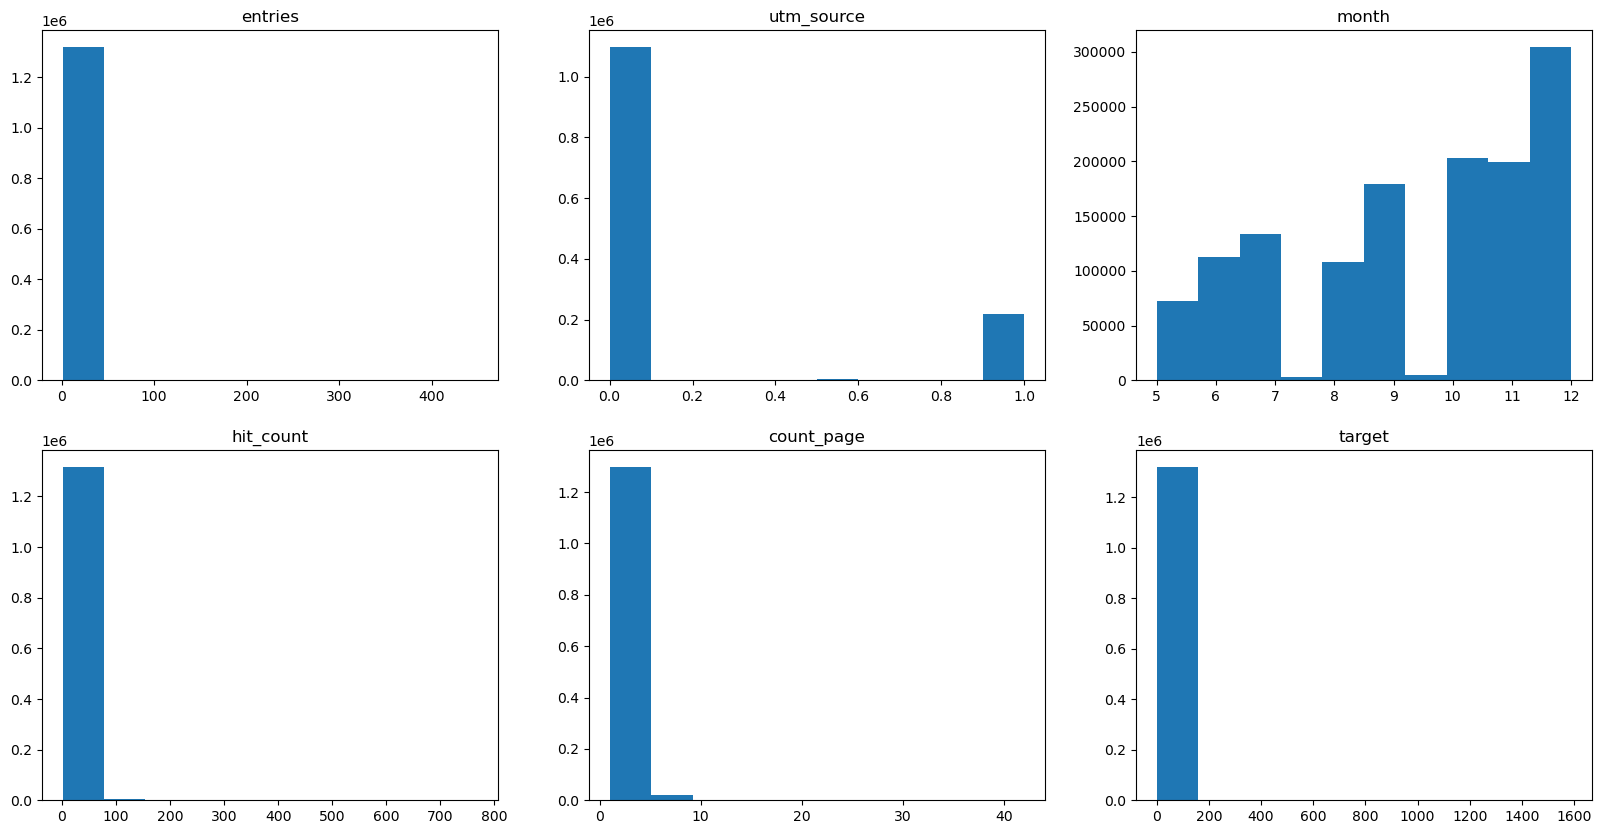

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
ax = axes.ravel()
for i, col in enumerate(num_col):
    ax[i].hist(df_merged_fin[col])
    ax[i].set_title(col)

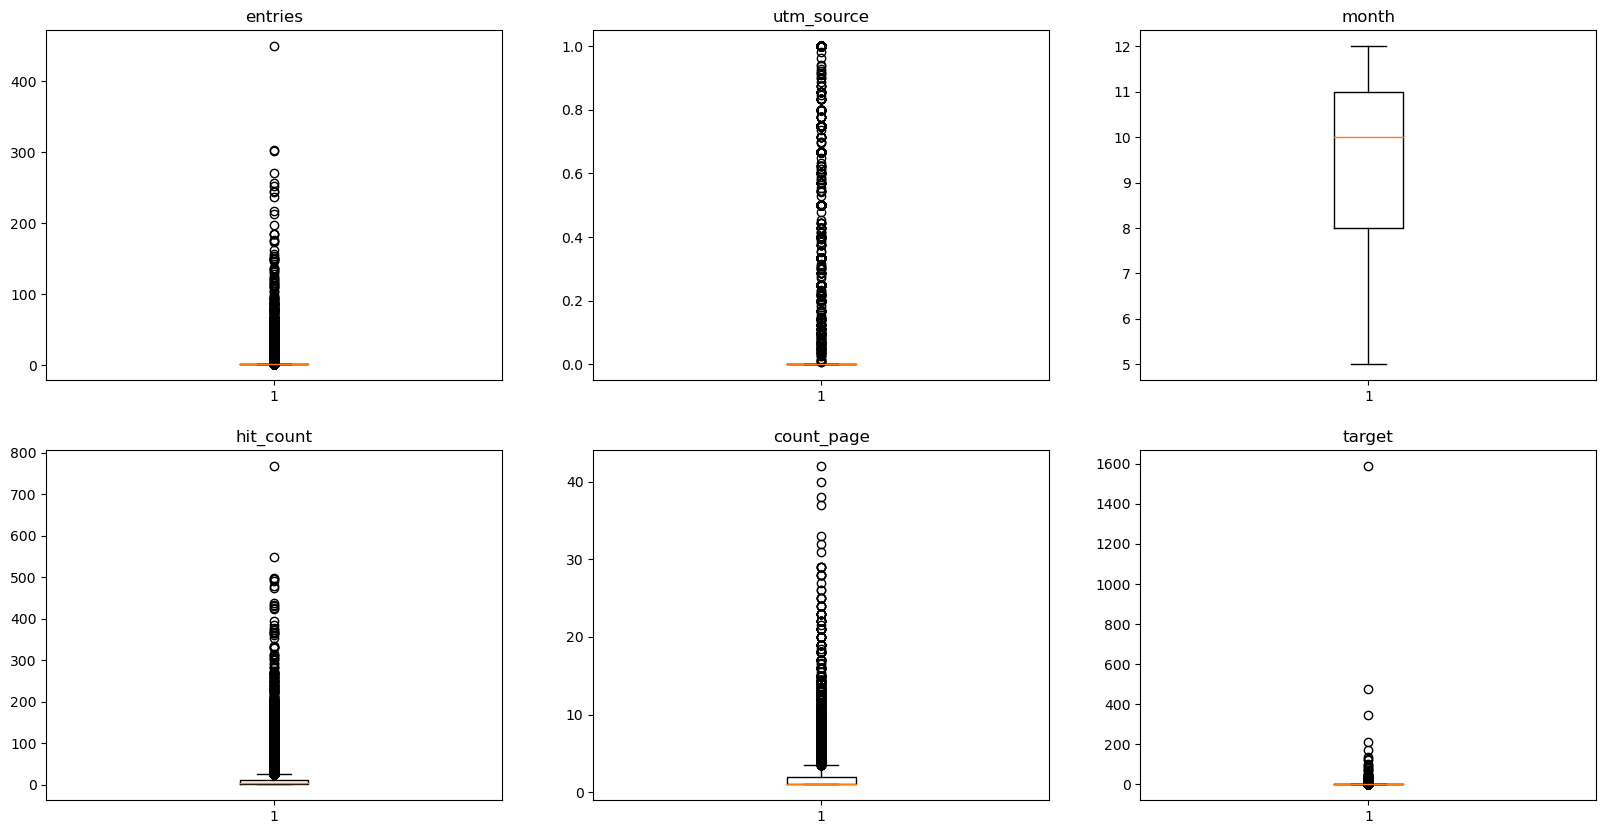

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
ax = axes.ravel()
for i, col in enumerate(num_col):
    ax[i].boxplot(df_merged_fin[col])
    ax[i].set_title(col)

In [8]:
df_merged_fin[num_col].describe()

,entries,utm_source,month,hit_count,count_page,target
count,1.320701e+06,1.320701e+06,1.320701e+06,1.320701e+06,1.320701e+06,1.320701e+06
mean,1.311626e+00,1.664867e-01,9.383964e+00,8.641836e+00,1.819916e+00,7.786925e-02
std,1.767962e+00,3.711335e-01,2.192258e+00,1.232285e+01,1.239523e+00,1.622575e+00
min,1.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,0.000000e+00,8.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,1.000000e+00,0.000000e+00,1.000000e+01,4.000000e+00,1.000000e+00,0.000000e+00
75%,1.000000e+00,0.000000e+00,1.100000e+01,1.100000e+01,2.000000e+00,0.000000e+00
max,4.490000e+02,1.000000e+00,1.200000e+01,7.680000e+02,4.200000e+01,1.588000e+03


In [6]:
df_merged_fin['device_screen_resolution'] = df_merged_fin['device_screen_resolution'].apply(lambda x: x if x in 
                                        ['414x896', '1920x1080', '375x812', '393x851'] else 'other')

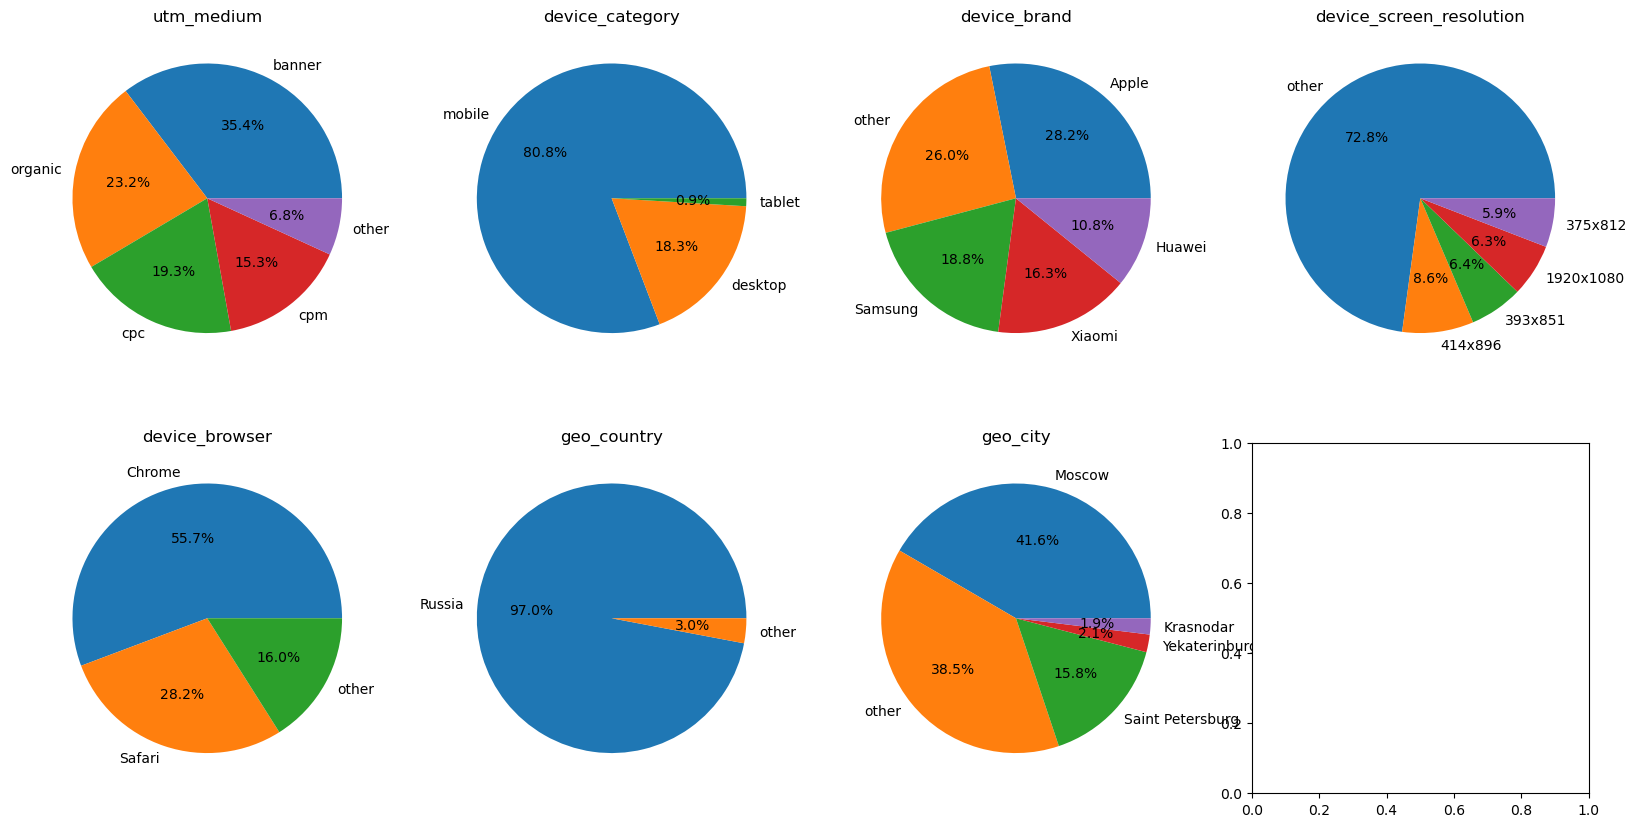

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
ax = axes.ravel()
for i, cat in enumerate(cat_col):
    x = df_merged_fin[cat].value_counts() #признаки
    index = x.index #наименования в признаках
    ax[i].pie(x=x, labels=index, autopct="%1.1f%%")
    ax[i].set_title(cat)

In [ ]:
# Уберем аномалии по следующему принципу:
# entries - количество заходов до 50,
# hit_count - количество действий - до 150
# target - количество целевых действий - до 30
# Уберем колонку client_id и target переведем в 0/1 (1 - 1 и больше целевых действий)

In [7]:
df_final = df_merged_fin.drop(['client_id'], axis=1)

In [8]:
df_final = df_final[(df_final['entries'] <= 50) & (df_final['hit_count'] <= 150) & (df_final['target'] <= 30)]

In [17]:
df_final.shape

(1320085, 13)

In [9]:
df_final['target'] = df_final['target'].apply(lambda x: 0 if x < 1 else 1)

In [21]:
df_final['target'].value_counts()

0    1276461
1      43624
Name: target, dtype: int64

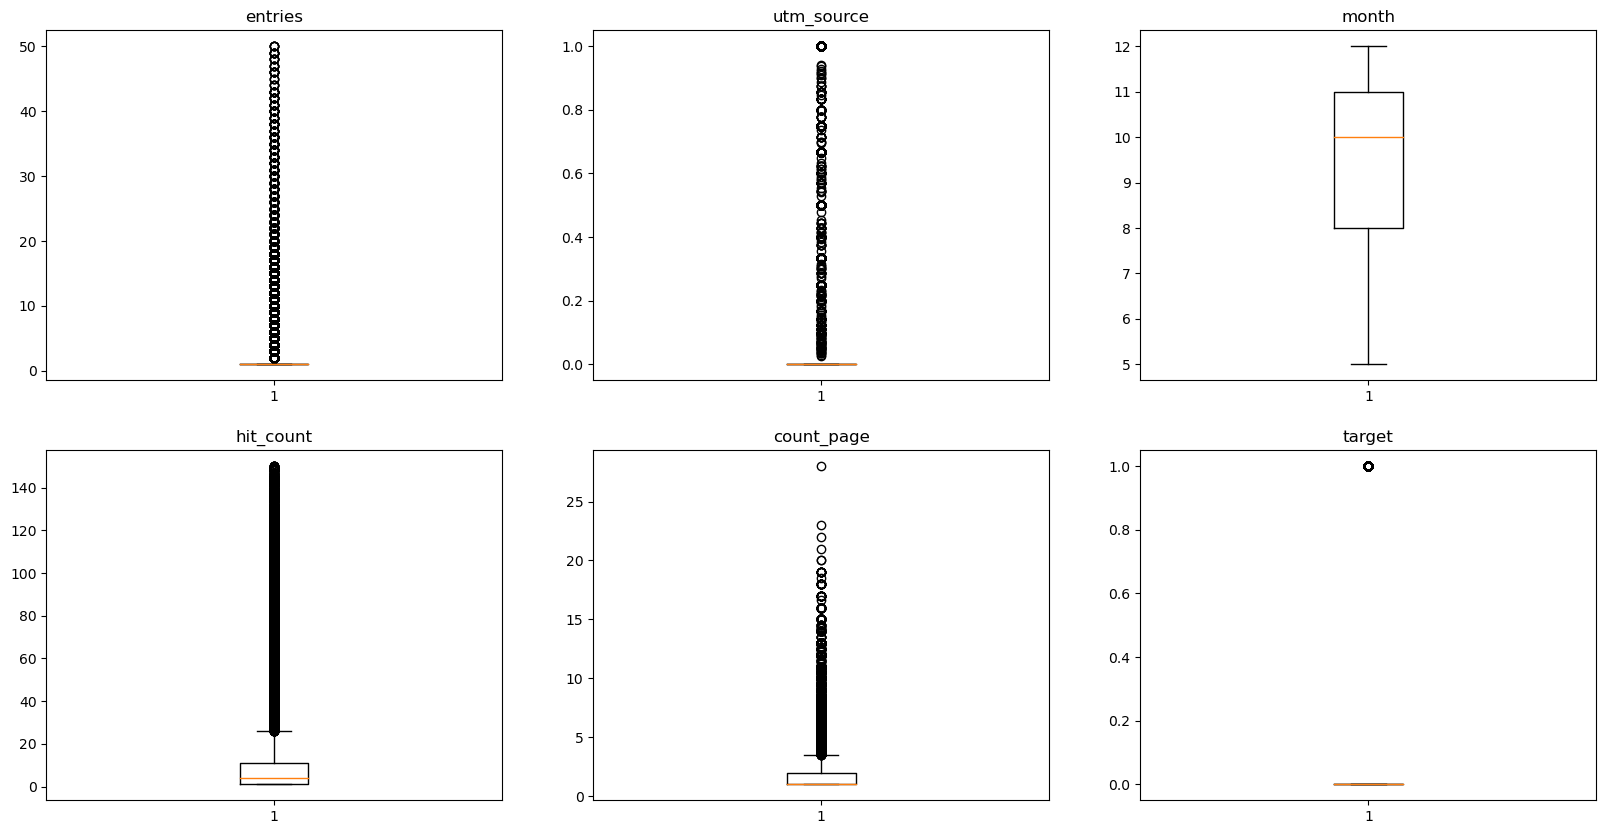

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
ax = axes.ravel()
for i, col in enumerate(num_col):
    ax[i].boxplot(df_final[col])
    ax[i].set_title(col)

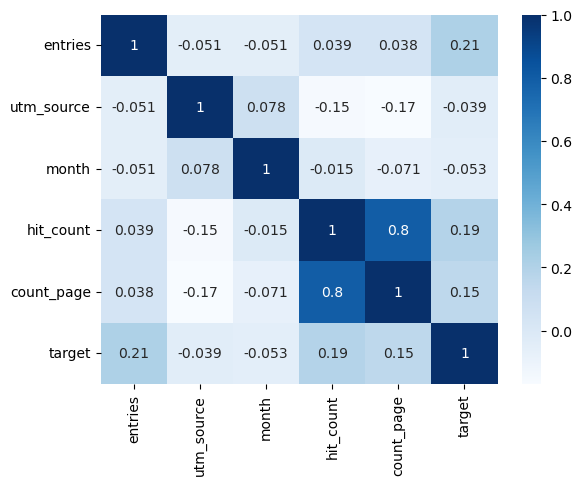

In [23]:
# Посмотрим корреляции
corr = df_final.corr()

sns.heatmap(corr, cmap="Blues", annot=True);

In [ ]:
# Есть достаточно сильная корреляция между количеством действий и количеством посещенных страниц, но не близкая к единице. 
# Возможно регуляризация не понадобится.

# Дальше сделаем OHE-кодирование

In [10]:
ohe = OneHotEncoder(sparse=False)

data = df_final[cat_col]

ohe.fit(data)
ohe_categorical = ohe.transform(data)

df_final[ohe.get_feature_names_out()] = ohe_categorical

In [11]:
df_final = df_final.drop(cat_col, axis=1)

In [29]:
df_final.head()

,entries,utm_source,month,hit_count,count_page,target,utm_medium_banner,utm_medium_cpc,utm_medium_cpm,utm_medium_organic,...,device_browser_Chrome,device_browser_Safari,device_browser_other,geo_country_Russia,geo_country_other,geo_city_Krasnodar,geo_city_Moscow,geo_city_Saint Petersburg,geo_city_Yekaterinburg,geo_city_other
0,1,0.0,12.0,7.0,2.0,0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,0.0,11.0,1.0,1.0,0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,1.0,9.0,1.0,1.0,0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,0.0,7.0,9.0,3.0,0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,0.0,5.0,7.0,2.0,0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [12]:
#Разделим выборку на обучающую и тестовую части

X = df_final.drop(['target'], axis=1)
y = df_final['target']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [32]:
x_train.shape

(924059, 33)

In [13]:
# Проведем нормализацию датасета
df_cols = x_train.columns.to_list()

mm_scaler = MinMaxScaler()

mm_scaler.fit(x_train)

x_train = pd.DataFrame(mm_scaler.transform(x_train), columns=df_cols)
x_test = pd.DataFrame(mm_scaler.transform(x_test), columns=df_cols)

In [13]:
x_train.head()

,entries,utm_source,month,hit_count,count_page,utm_medium_banner,utm_medium_cpc,utm_medium_cpm,utm_medium_organic,utm_medium_other,...,device_browser_Chrome,device_browser_Safari,device_browser_other,geo_country_Russia,geo_country_other,geo_city_Krasnodar,geo_city_Moscow,geo_city_Saint Petersburg,geo_city_Yekaterinburg,geo_city_other
0,0.020408,0.0,0.928571,0.114094,0.092593,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000000,0.0,0.857143,0.134228,0.000000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000000,0.0,0.285714,0.013423,0.000000,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.000000,1.0,0.714286,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.0,0.857143,0.154362,0.037037,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
x_test.head()

,entries,utm_source,month,hit_count,count_page,utm_medium_banner,utm_medium_cpc,utm_medium_cpm,utm_medium_organic,utm_medium_other,...,device_browser_Chrome,device_browser_Safari,device_browser_other,geo_country_Russia,geo_country_other,geo_city_Krasnodar,geo_city_Moscow,geo_city_Saint Petersburg,geo_city_Yekaterinburg,geo_city_other
0,0.000000,0.0,1.000000,0.181208,0.111111,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.020408,0.0,0.642857,0.010067,0.000000,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000000,0.0,0.000000,0.046980,0.037037,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.000000,0.0,0.285714,0.073826,0.074074,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.000000,0.0,0.142857,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Modeling

In [14]:
# Применим лог рег

model = LogisticRegression()

model.fit(x_train, y_train)

pred = model.predict(x_test)

print(round(roc_auc_score(y_test, pred), 4))

0.5206


In [15]:
print(model.coef_)

[[16.40128678  0.2665832  -0.75057909  5.66169223  1.82843216  0.01959886
  -0.22003894 -0.80015126  0.07331606 -0.39454494 -0.47768779 -0.35952554
  -0.48460689 -0.270554   -0.29807161 -0.09063931 -0.34865968 -0.31389563
  -0.40481487 -0.25402868 -0.15154342 -0.29974001 -0.21169326 -0.4208001
  -0.49579926 -0.40522087 -0.55669543 -0.7651248  -0.07670986 -0.18763019
  -0.31098992 -0.41791782 -0.32857244]]


In [41]:
# Сделаем перевод вероятностей предсказаний логистической регрессии в классы с разным значением порога
pred_proba = pd.DataFrame({'proba': model.predict_proba(x_test)[:,1].T})

In [49]:
treshold = 0
best_res = 0
for i in np.arange(0.05, 0.95, 0.05):
    res = pred_proba['proba'].apply(lambda x:0 if x < i else 1)
    tmp_score = round(roc_auc_score(y_test, res), 4)
    if tmp_score > best_res:
        best_res = tmp_score
        treshold = i
    print(f"i - {i}, res - {tmp_score}")
print(treshold)
print(best_res)

i - 0.05, res - 0.7055
i - 0.1, res - 0.615
i - 0.15000000000000002, res - 0.5751
i - 0.2, res - 0.5555
i - 0.25, res - 0.5449
i - 0.3, res - 0.5374
i - 0.35000000000000003, res - 0.5316
i - 0.4, res - 0.527
i - 0.45, res - 0.5233
i - 0.5, res - 0.5206
i - 0.55, res - 0.5178
i - 0.6000000000000001, res - 0.516
i - 0.6500000000000001, res - 0.5142
i - 0.7000000000000001, res - 0.5122
i - 0.7500000000000001, res - 0.5108
i - 0.8, res - 0.5095
i - 0.8500000000000001, res - 0.5079
i - 0.9000000000000001, res - 0.5066
0.05
0.7055


In [50]:
treshold = 0
best_res = 0
for i in np.arange(0.01, 0.15, 0.01):
    res = pred_proba['proba'].apply(lambda x:0 if x < i else 1)
    tmp_score = round(roc_auc_score(y_test, res), 4)
    if tmp_score > best_res:
        best_res = tmp_score
        treshold = i
    print(f"i - {i}, res - {tmp_score}")
print(treshold)
print(best_res)

i - 0.01, res - 0.539
i - 0.02, res - 0.6963
i - 0.03, res - 0.7462
i - 0.04, res - 0.7342
i - 0.05, res - 0.7055
i - 0.060000000000000005, res - 0.681
i - 0.06999999999999999, res - 0.659
i - 0.08, res - 0.6417
i - 0.09, res - 0.6267
i - 0.09999999999999999, res - 0.615
i - 0.11, res - 0.6042
i - 0.12, res - 0.5951
i - 0.13, res - 0.5863
i - 0.14, res - 0.5807
0.03
0.7462


In [ ]:
# Лучшее значение в 0,746 получаем при пороге 0,03

In [ ]:
# Сделаем pipeline решения и обучим его на всем датасете

## Tecnical

In [ ]:
def sessions_transform(sessions):
    sessions.drop_duplicates()

    # Удаляем колонки с пустыми и неинформативными значениями
    empty_cols = ['utm_keyword', 'device_os', 'device_model', 'utm_campaign', 'utm_adcontent', 'visit_time']
    sessions = sessions.drop(empty_cols, axis=1)

    # Делим траффик на органический и самые популярные неорганические каналы
    sessions['utm_medium'] = sessions['utm_medium'].apply(lambda x: 'organic' if x in ['organic', 'referral', '(none)'] else x)
    sessions['utm_medium'] = sessions['utm_medium'].apply(lambda x: x if x in ['organic', 'banner', 'cpc', 'cpm'] else 'other')

    # Рекламу в соц сетях разделим на да - 1, нет - 0
    commerce = ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs',
    'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw',
    'gVRrcxiDQubJiljoTbGm']
    sessions['utm_source'] = sessions['utm_source'].apply(lambda x: 1 if x in commerce else 0)

    # Разделю на самые популярные и остальные
    sessions['device_brand'] = sessions['device_brand'].apply(lambda x: x if x in ['Apple', 'Samsung', 'Xiaomi', 'Huawei'] 
                                                      else 'other')
    sessions['device_screen_resolution'] = sessions['device_screen_resolution'].apply(lambda x: x if x in 
                                    ['414x896', '1920x1080', '375x812', '393x851'] else 'other')

    # Разделю на Хром, Сафари и остальные. Отдельно соберу Сафари в одну строку
    sessions['device_browser'] = sessions['device_browser'].apply(lambda x: 'Safari' if 'Safari' in 
                                    x else x)
    sessions['device_browser'] = sessions['device_browser'].apply(lambda x: x if x in ['Safari', 'Chrome'] else 'other')

    # Россия - 1, остальные - 0
    sessions['geo_country'] = sessions['geo_country'].apply(lambda x: x if x == 'Russia' else 'other')        

    # Разделю на самые популярные и остальные
    cities = ['Moscow', 'Saint Petersburg', 'Yekaterinburg', 'Krasnodar']
    sessions['geo_city'] = sessions['geo_city'].apply(lambda x: x if x in cities else 'other')

    # Дату визита разделю на месяц, так как все данные за один год.
    sessions['month'] = sessions['visit_date'].apply(lambda x: x.month)
    sessions = sessions.drop(['visit_date'], axis=1)

    return sessions


def hits_transform(hits):
    #drop_duplicates
    hits.drop_duplicates()

    # del empty cols
    empty_cols_2 = ['hit_time', 'hit_referer', 'event_label', 'event_value']
    hits = hits.drop(empty_cols_2, axis=1)

    # Переведу целевые действия в 0/1
    goal = ['sub_car_claim_click', 'sub_car_claim_submit_click', 'sub_open_dialog_click', 'sub_custom_question_submit_click',
    'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success', 'sub_car_request_submit_click']
    hits['event_action'] = hits['event_action'].apply(lambda x: 1 if x in goal else 0)

    # Проведу группировку по session_id и аггрегацию 
    hits_2 = hits.groupby('session_id').agg(hit_count=('hit_type','count'),
                  count_page=('hit_page_path', 'nunique'),
                  target=('event_action', 'sum'))
    hits_2.reset_index(inplace= True)

    return hits_2


def df_merge(sessions, hits_2):
    df_merged = pd.merge(
        sessions, hits_2,
        left_on='session_id',
        right_on='session_id'
    )

    # Сделаем группировку по client_id и аггрегацию по остальным столбцам
    get_max = lambda x: pd.Series.mode(x)[0]
    df_merged_fin = df_merged.groupby('client_id').agg(entries=('session_id','nunique'),
                  utm_source=('utm_source', 'mean'), utm_medium=('utm_medium', get_max),
                  device_category=('device_category', get_max), device_brand=('device_brand', get_max),
                  device_screen_resolution=('device_screen_resolution', get_max), 
                  device_browser=('device_browser', get_max), geo_country=('geo_country', get_max), 
                  geo_city=('geo_city', get_max), month=('month', 'mean'), 
                  hit_count=('hit_count', 'mean'), count_page=('count_page', 'mean'),                                                   
                  target=('target', 'sum')
                  )
    df_merged_fin.reset_index(inplace= True)   

    # Уберем аномалии по следующему принципу:
    # entries - количество заходов до 50,
    # hit_count - количество действий - до 150
    # target - количество целевых действий - до 30
    # Уберем колонку client_id и target переведем в 0/1 (1 - 1 и больше целевых действий)
    df_final = df_merged_fin.drop(['client_id'], axis=1)
    df_final = df_final[(df_final['entries'] <= 50) & (df_final['hit_count'] <= 150) & (df_final['target'] <= 30)]
    df_final['target'] = df_final['target'].apply(lambda x: 0 if x < 1 else 1)

    return df_final

def divide(df_final):
    X = df_final.drop(['target'], axis=1)
    y = df_final['target']
    return X, y

def x_transform(X):
    num_col = X.select_dtypes(include=['float64', 'int64']).columns.to_list()[1:]
    cat_col = X.select_dtypes(include=['object']).columns.to_list()

    ohe = OneHotEncoder(sparse=False)
    data = X[cat_col]
    ohe.fit(data)
    ohe_categorical = ohe.transform(data)
    X[ohe.get_feature_names_out()] = ohe_categorical
    X = X.drop(cat_col, axis=1)
    
    mm_scaler = MinMaxScaler()
    data = X[num_col]
    mm_scaler.fit(data)
    X[num_col] = pd.DataFrame(mm_scaler.transform(data), columns=num_col)
    
    return X  


def log_model(X, y):
    model = LogisticRegression()
    model.fit(X, y)
    return model
    

def pipeline():
    with open('data/ga_sessions.pkl', 'rb') as file:
        sessions = pickle.load(file)
    with open('data/ga_hits-001.pkl', 'rb') as file:
        hits = pickle.load(file)   
    
    # от загрузки исходников до X, y 
    preprocessor = Pipeline(steps=[
        ('sessions_transform', FunctionTransformer(sessions_transform)),
        ('hits_transform', FunctionTransformer(hits_transform)),
        ('df_merge', FunctionTransformer(df_merge)),
        ('divide', FunctionTransformer(divide)),
        ('x_transform', FunctionTransformer(x_transform))
    ])     

    modeling = Pipeline(steps=[
        ('modeling', FunctionTransformer(log_model))
    ])
    
    pipe = Pipeline([
            ('preprocessor', preprocessor),
            ('modeling', modeling)
        ])
    
    result = pipe(sessions, hits)
    
    with open('model/fin_model.pkl', 'wb') as file:
        dill.dump(result, file)
    
    
    
if __name__ == '__main__':
    pipeline() 
    

In [ ]:
# И напищем файл предикт

In [2]:
df = pd.read_csv('data\pipe_sessions.csv')

In [3]:
cols = df.columns.to_list()

for col in cols:
    print(f'{col}, {sum(df[col].isna())}, % isna {round(100 * sum(df[col].isna()) / df.shape[0], 2)} %')

session_id, 0, % isna 0.0 %
client_id, 0, % isna 0.0 %
visit_number, 0, % isna 0.0 %
utm_source, 0, % isna 0.0 %
utm_medium, 0, % isna 0.0 %
device_category, 0, % isna 0.0 %
device_brand, 0, % isna 0.0 %
device_screen_resolution, 0, % isna 0.0 %
device_browser, 0, % isna 0.0 %
geo_country, 0, % isna 0.0 %
geo_city, 0, % isna 0.0 %
month, 0, % isna 0.0 %


In [4]:
df = pd.read_csv('data\pipe_hits_2.csv')
cols = df.columns.to_list()
for col in cols:
    print(f'{col}, {sum(df[col].isna())}, % isna {round(100 * sum(df[col].isna()) / df.shape[0], 2)} %')

session_id, 0, % isna 0.0 %
hit_count, 0, % isna 0.0 %
count_page, 0, % isna 0.0 %
target, 0, % isna 0.0 %


In [5]:
df = pd.read_csv('data\pipe_df_final.csv')
cols = df.columns.to_list()
for col in cols:
    print(f'{col}, {sum(df[col].isna())}, % isna {round(100 * sum(df[col].isna()) / df.shape[0], 2)} %')

entries, 0, % isna 0.0 %
utm_source, 0, % isna 0.0 %
utm_medium, 0, % isna 0.0 %
device_category, 0, % isna 0.0 %
device_brand, 0, % isna 0.0 %
device_screen_resolution, 0, % isna 0.0 %
device_browser, 0, % isna 0.0 %
geo_country, 0, % isna 0.0 %
geo_city, 0, % isna 0.0 %
month, 0, % isna 0.0 %
hit_count, 0, % isna 0.0 %
count_page, 0, % isna 0.0 %
target, 0, % isna 0.0 %


In [6]:
df = pd.read_csv('data\pipe_X.csv')
cols = df.columns.to_list()
for col in cols:
    print(f'{col}, {sum(df[col].isna())}, % isna {round(100 * sum(df[col].isna()) / df.shape[0], 2)} %')

entries, 0, % isna 0.0 %
utm_source, 0, % isna 0.0 %
utm_medium, 0, % isna 0.0 %
device_category, 0, % isna 0.0 %
device_brand, 0, % isna 0.0 %
device_screen_resolution, 0, % isna 0.0 %
device_browser, 0, % isna 0.0 %
geo_country, 0, % isna 0.0 %
geo_city, 0, % isna 0.0 %
month, 0, % isna 0.0 %
hit_count, 0, % isna 0.0 %
count_page, 0, % isna 0.0 %


In [16]:
df = pd.read_csv('data\pipe_y.csv')
cols = df.columns.to_list()
for col in cols:
    print(f'{col}, {sum(df[col].isna())}, % isna {round(100 * sum(df[col].isna()) / df.shape[0], 2)} %')
print(df.shape)

target, 0, % isna 0.0 %
(1320086, 1)


In [13]:
df = pd.read_csv('data\pipe_X_trans.csv')
cols = df.columns.to_list()
for col in cols:
    print(f'{col}, {sum(df[col].isna())}, % isna {round(100 * sum(df[col].isna()) / df.shape[0], 2)} %')

entries, 0, % isna 0.0 %
utm_source, 616, % isna 0.05 %
month, 616, % isna 0.05 %
hit_count, 616, % isna 0.05 %
count_page, 616, % isna 0.05 %
utm_medium_banner, 0, % isna 0.0 %
utm_medium_cpc, 0, % isna 0.0 %
utm_medium_cpm, 0, % isna 0.0 %
utm_medium_organic, 0, % isna 0.0 %
utm_medium_other, 0, % isna 0.0 %
device_category_desktop, 0, % isna 0.0 %
device_category_mobile, 0, % isna 0.0 %
device_category_tablet, 0, % isna 0.0 %
device_brand_Apple, 0, % isna 0.0 %
device_brand_Huawei, 0, % isna 0.0 %
device_brand_Samsung, 0, % isna 0.0 %
device_brand_Xiaomi, 0, % isna 0.0 %
device_brand_other, 0, % isna 0.0 %
device_screen_resolution_1920x1080, 0, % isna 0.0 %
device_screen_resolution_375x812, 0, % isna 0.0 %
device_screen_resolution_393x851, 0, % isna 0.0 %
device_screen_resolution_414x896, 0, % isna 0.0 %
device_screen_resolution_other, 0, % isna 0.0 %
device_browser_Chrome, 0, % isna 0.0 %
device_browser_Safari, 0, % isna 0.0 %
device_browser_other, 0, % isna 0.0 %
geo_country_Russi

In [14]:
df[['utm_source', 'month', 'hit_count', 'count_page']] = df[['utm_source', 'month', 'hit_count', 'count_page']]. fillna(df[['utm_source', 'month', 'hit_count', 'count_page']].mean())
df = df.reset_index(drop=True)

cols = df.columns.to_list()
for col in cols:
    print(f'{col}, {sum(df[col].isna())}, % isna {round(100 * sum(df[col].isna()) / df.shape[0], 2)} %')

entries, 0, % isna 0.0 %
utm_source, 0, % isna 0.0 %
month, 0, % isna 0.0 %
hit_count, 0, % isna 0.0 %
count_page, 0, % isna 0.0 %
utm_medium_banner, 0, % isna 0.0 %
utm_medium_cpc, 0, % isna 0.0 %
utm_medium_cpm, 0, % isna 0.0 %
utm_medium_organic, 0, % isna 0.0 %
utm_medium_other, 0, % isna 0.0 %
device_category_desktop, 0, % isna 0.0 %
device_category_mobile, 0, % isna 0.0 %
device_category_tablet, 0, % isna 0.0 %
device_brand_Apple, 0, % isna 0.0 %
device_brand_Huawei, 0, % isna 0.0 %
device_brand_Samsung, 0, % isna 0.0 %
device_brand_Xiaomi, 0, % isna 0.0 %
device_brand_other, 0, % isna 0.0 %
device_screen_resolution_1920x1080, 0, % isna 0.0 %
device_screen_resolution_375x812, 0, % isna 0.0 %
device_screen_resolution_393x851, 0, % isna 0.0 %
device_screen_resolution_414x896, 0, % isna 0.0 %
device_screen_resolution_other, 0, % isna 0.0 %
device_browser_Chrome, 0, % isna 0.0 %
device_browser_Safari, 0, % isna 0.0 %
device_browser_other, 0, % isna 0.0 %
geo_country_Russia, 0, % isna

In [15]:
df.shape

(1320086, 33)